In [1]:
import pandas as pd
import numpy as np

In [2]:
def manhattan_distance(x1, x2):
    """Tính khoảng cách Manhattan giữa hai điểm"""
    return np.sum(np.abs(x1 - x2))

In [3]:
def kmeans(X, k, max_iters=100):
    """Thuật toán K-means với khoảng cách Manhattan"""
    # Chuyển đổi DataFrame thành numpy array nếu cần
    if isinstance(X, pd.DataFrame):
        # Chỉ lấy các cột số (bỏ qua cột tên nếu có)
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        X_array = X[numeric_columns].values
    else:
        X_array = X
    
    n_samples, n_features = X_array.shape
    
    # Khởi tạo ngẫu nhiên các centroid
    idx = np.random.choice(n_samples, k, replace=False)
    centroids = X_array[idx]
    
    for _ in range(max_iters):
        # Gán nhãn cụm
        labels = np.array([np.argmin([manhattan_distance(x, c) for c in centroids]) for x in X_array])
        
        # Cập nhật centroid
        new_centroids = np.array([X_array[labels == i].mean(axis=0) for i in range(k)])
        
        # Kiểm tra hội tụ
        if np.allclose(centroids, new_centroids, atol=1e-6):
            break
        centroids = new_centroids
    
    return labels, centroids

In [4]:
import matplotlib.pyplot as plt

def elbow_method(X, max_k=10):
    """Khảo sát số cụm k bằng phương pháp Elbow"""
    # Chuyển đổi DataFrame thành numpy array nếu cần
    if isinstance(X, pd.DataFrame):
        # Chỉ lấy các cột số (bỏ qua cột tên nếu có)
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        X_array = X[numeric_columns].values
        print(f"Sử dụng các cột: {list(numeric_columns)}")
    else:
        X_array = X
    
    print(f"Kích thước dữ liệu: {X_array.shape}")
    
    inertias = []
    for k in range(1, max_k + 1):
        labels, centroids = kmeans(X_array, k)
        inertia = 0
        for i in range(len(X_array)):
            inertia += manhattan_distance(X_array[i], centroids[labels[i]])
        inertias.append(inertia)
        print(f"k={k}, inertia={inertia:.2f}")
    
    # Vẽ biểu đồ Elbow
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), inertias, 'bo-')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
    
    return inertias

Loading Countries.csv...
Dữ liệu gốc: (200, 3)
Các cột: ['name', 'Longitude', 'Latitude']
Kiểu dữ liệu các cột:
name          object
Longitude    float64
Latitude     float64
dtype: object

Một vài dòng đầu tiên:
              name   Longitude   Latitude
0            China  103.819074  36.561765
1   CÃ´te d'Ivoire   -5.569216   7.628426
2         Cameroon   12.739642   5.691098
3  Dem. Rep. Congo   23.643961  -2.877463
4            Congo   15.219658  -0.837875

Thực hiện Elbow Method...
Sử dụng các cột: ['Longitude', 'Latitude']
Kích thước dữ liệu: (200, 2)
k=1, inertia=14935.06
k=2, inertia=11384.34
k=3, inertia=8133.87
k=4, inertia=6950.45
k=5, inertia=6208.43
k=6, inertia=5733.50
k=7, inertia=4850.40
k=8, inertia=4268.36


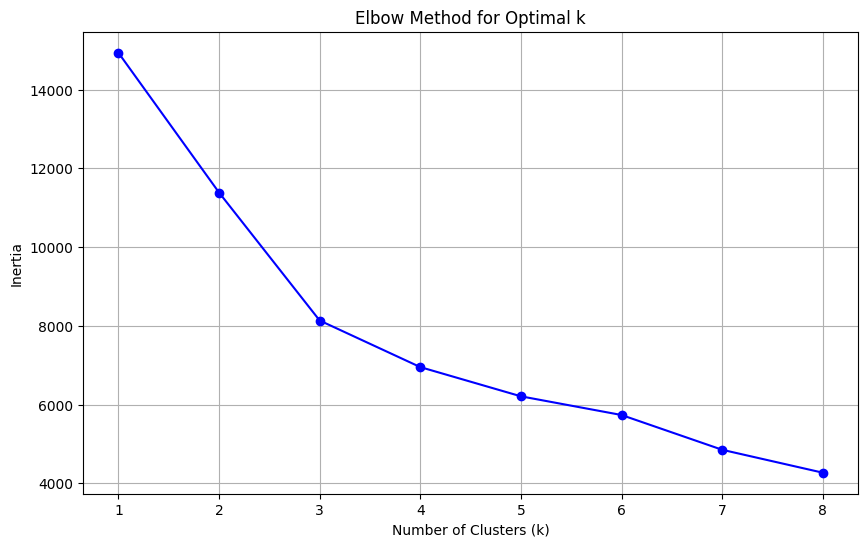

In [ ]:
def visualize_clusters(X, k=3):
    """Trực quan hóa kết quả phân cụm"""
    if isinstance(X, pd.DataFrame):
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        X_array = X[numeric_columns].values
    else:
        X_array = X
    
    labels, centroids = kmeans(X_array, k)
    
    plt.figure(figsize=(12, 8))
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
    
    for i in range(k):
        cluster_points = X_array[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                   c=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.6)
    
    # Vẽ centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], 
               c='black', marker='x', s=200, linewidths=3, label='Centroids')
    
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return labels, centroids

# Thực thi trên tập dữ liệu Countries
print("Loading Countries.csv...")
X = pd.read_csv('Countries.csv')
print(f"Dữ liệu gốc: {X.shape}")
print(f"Các cột: {list(X.columns)}")
print(f"Kiểu dữ liệu các cột:")
print(X.dtypes)
print("\nMột vài dòng đầu tiên:")
print(X.head())

# Sử dụng Enhanced Elbow Method
print("\n" + "="*60)
print("DEMO: SỬ DỤNG ENHANCED ELBOW METHOD")
print("="*60)
inertias, optimal_k = enhanced_elbow_method(X, max_k=8)

# Visualize kết quả với k tối ưu đã tìm được
if optimal_k:
    print(f"\n🎯 Áp dụng K-means với k={optimal_k}:")
    labels, centroids = visualize_clusters(X, k=optimal_k)

# Giải thích về Phương pháp Elbow và Cách chọn k phù hợp

## 1. Phương pháp Elbow là gì?

Phương pháp Elbow (Elbow Method) là một kỹ thuật phổ biến để xác định số cụm tối ưu (k) trong thuật toán K-means clustering.

### Nguyên lý hoạt động:
- **Inertia (Within-cluster Sum of Squares - WCSS)**: Đo lường độ phân tán của các điểm dữ liệu trong từng cụm
- **Công thức**: Inertia = Σ distance(điểm_i, centroid_của_cụm_i)
- Trong code này sử dụng khoảng cách Manhattan thay vì Euclidean

### Cách thức hoạt động:
1. Chạy K-means với các giá trị k khác nhau (từ 1 đến max_k)
2. Tính inertia cho mỗi giá trị k
3. Vẽ biểu đồ inertia theo k
4. Tìm "khuỷu tay" (elbow) trên đồ thị

## 2. Cách lựa chọn k phù hợp

### Dấu hiệu nhận biết k tối ưu:
- **Điểm Elbow**: Vị trí mà inertia giảm mạnh rồi chuyển sang giảm chậm
- **Tỷ lệ giảm**: Khi tốc độ giảm inertia chậm lại đáng kể
- **Hình dạng đồ thị**: Tìm điểm uốn cong rõ rệt nhất

### Các yếu tố cần xem xét:
1. **Độ giảm inertia**: 
   - k=1→2: Giảm nhiều
   - k=2→3: Giảm vừa phải
   - k=3→4: Giảm ít → k=3 có thể là lựa chọn tốt

2. **Ý nghĩa thực tế**: 
   - Số cụm phải có ý nghĩa trong bối cảnh bài toán
   - Ví dụ: Phân nhóm quốc gia theo vị trí địa lý

3. **Độ phức tạp mô hình**:
   - Quá nhiều cụm → overfitting
   - Quá ít cụm → underfitting

In [ ]:
def find_optimal_k_elbow(inertias):
    """
    Tự động tìm k tối ưu bằng cách phân tích độ dốc của đường elbow
    """
    # Tính sự thay đổi inertia giữa các k liên tiếp
    differences = []
    for i in range(1, len(inertias)):
        diff = inertias[i-1] - inertias[i]
        differences.append(diff)
    
    # Tính tỷ lệ thay đổi của độ dốc
    rate_of_change = []
    for i in range(1, len(differences)):
        rate = differences[i-1] - differences[i]
        rate_of_change.append(rate)
    
    print("Phân tích Elbow Method:")
    print("k\tInertia\t\tGiảm\t\tTỷ lệ thay đổi")
    print("-" * 50)
    
    for i in range(len(inertias)):
        k = i + 1
        inertia = inertias[i]
        
        if i == 0:
            print(f"{k}\t{inertia:.2f}\t\t-\t\t-")
        elif i == 1:
            diff = differences[i-1]
            print(f"{k}\t{inertia:.2f}\t\t{diff:.2f}\t\t-")
        else:
            diff = differences[i-1]
            rate = rate_of_change[i-2]
            print(f"{k}\t{inertia:.2f}\t\t{diff:.2f}\t\t{rate:.2f}")
    
    # Tìm k tối ưu dựa trên tỷ lệ thay đổi
    if len(rate_of_change) > 0:
        # Tìm vị trí có tỷ lệ thay đổi lớn nhất (điểm elbow)
        max_rate_idx = np.argmax(rate_of_change)
        optimal_k = max_rate_idx + 3  # +3 vì bắt đầu từ k=3
        
        print(f"\n💡 Gợi ý k tối ưu: {optimal_k}")
        print(f"   Lý do: Tỷ lệ thay đổi độ dốc lớn nhất tại k={optimal_k}")
        
        return optimal_k
    
    return None

def enhanced_elbow_method(X, max_k=10):
    """
    Phương pháp Elbow cải tiến với phân tích tự động
    """
    print("=" * 60)
    print("PHƯƠNG PHÁP ELBOW - PHÂN TÍCH SỐ CỤM TỐI ƯU")
    print("=" * 60)
    
    # Chạy elbow method cơ bản
    inertias = elbow_method(X, max_k)
    
    print("\n" + "=" * 60)
    
    # Phân tích và tìm k tối ưu
    optimal_k = find_optimal_k_elbow(inertias)
    
    # Vẽ biểu đồ với điểm elbow được đánh dấu
    if optimal_k:
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, max_k + 1), inertias, 'bo-', linewidth=2, markersize=8)
        plt.plot(optimal_k, inertias[optimal_k-1], 'ro', markersize=15, 
                label=f'Optimal k = {optimal_k}')
        plt.title('Elbow Method - Phân tích điểm Elbow', fontsize=14)
        plt.xlabel('Số cụm (k)', fontsize=12)
        plt.ylabel('Inertia (Manhattan Distance)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12)
        
        # Thêm annotation
        plt.annotate(f'Điểm Elbow\nk = {optimal_k}', 
                    xy=(optimal_k, inertias[optimal_k-1]), 
                    xytext=(optimal_k+0.5, inertias[optimal_k-1]+max(inertias)*0.1),
                    arrowprops=dict(arrowstyle='->', color='red', lw=2),
                    fontsize=11, ha='center')
        
        plt.tight_layout()
        plt.show()
    
    return inertias, optimal_k

## 3. Hướng dẫn thực hành

### Các bước thực hiện:

1. **Chạy Elbow Method**:
   ```python
   inertias = elbow_method(data, max_k=8)
   ```

2. **Phân tích kết quả**:
   - Xem biểu đồ và tìm điểm "khuỷu tay"
   - Quan sát sự giảm của inertia
   - Chọn k tại điểm elbow

3. **Kiểm tra bằng visualization**:
   ```python
   visualize_clusters(data, k=optimal_k)
   ```

### Lưu ý quan trọng:

- **Không có elbow rõ ràng**: Chọn k dựa trên ý nghĩa thực tế
- **Nhiều elbow**: Chọn elbow đầu tiên (k nhỏ hơn)
- **Dữ liệu ít**: Tránh k quá lớn so với số điểm dữ liệu
- **Kiểm tra kết quả**: Luôn visualize để đánh giá chất lượng clustering

### Công thức tính Inertia (Manhattan):
```
Inertia = Σ(i=1 to n) |x_i - centroid_của_cụm_i|
```

Trong đó:
- x_i: điểm dữ liệu thứ i
- centroid: tâm cụm mà điểm x_i thuộc về
- |.|: khoảng cách Manhattan

## 4. Phân tích kết quả thực tế trên dataset Countries

### Dữ liệu Countries.csv:
- **Kích thước**: 200 quốc gia với 3 cột (name, Longitude, Latitude)
- **Đặc điểm**: Dữ liệu địa lý (kinh độ, vĩ độ) của các quốc gia
- **Mục tiêu**: Phân cụm các quốc gia theo vị trí địa lý

### Kết quả Elbow Method đã thu được:
```
k=1, inertia=14935.06  (Giảm: -)
k=2, inertia=11384.34  (Giảm: 3550.72)
k=3, inertia=8133.87   (Giảm: 3250.47)
k=4, inertia=6950.45   (Giảm: 1183.42)
k=5, inertia=6208.43   (Giảm: 742.02)
k=6, inertia=5733.50   (Giảm: 474.93)
k=7, inertia=4850.40   (Giảm: 883.10)
k=8, inertia=4268.36   (Giảm: 582.04)
```

In [ ]:
# Phân tích chi tiết kết quả Elbow Method cho Countries dataset
def analyze_countries_results():
    """
    Phân tích và giải thích kết quả Elbow Method cho dữ liệu Countries
    """
    print("📊 PHÂN TÍCH CHI TIẾT KẾT QUẢ ELBOW METHOD")
    print("=" * 60)
    
    # Dữ liệu inertia từ kết quả thực tế
    k_values = [1, 2, 3, 4, 5, 6, 7, 8]
    inertias = [14935.06, 11384.34, 8133.87, 6950.45, 6208.43, 5733.50, 4850.40, 4268.36]
    
    # Tính độ giảm và tỷ lệ giảm
    decreases = []
    for i in range(1, len(inertias)):
        decrease = inertias[i-1] - inertias[i]
        decreases.append(decrease)
    
    # Tính tỷ lệ thay đổi độ giảm
    rate_changes = []
    for i in range(1, len(decreases)):
        rate_change = decreases[i-1] - decreases[i]
        rate_changes.append(rate_change)
    
    print("k\tInertia\t\tGiảm\t\tTỷ lệ thay đổi\tNhận xét")
    print("-" * 80)
    
    for i, k in enumerate(k_values):
        inertia = inertias[i]
        
        if i == 0:
            print(f"{k}\t{inertia:.2f}\t\t-\t\t-\t\tĐiểm khởi đầu")
        elif i == 1:
            decrease = decreases[i-1]
            print(f"{k}\t{inertia:.2f}\t\t{decrease:.2f}\t\t-\t\tGiảm mạnh")
        else:
            decrease = decreases[i-1]
            if i-2 < len(rate_changes):
                rate = rate_changes[i-2]
                
                # Phân tích và nhận xét
                if rate > 1000:
                    comment = "⚠️ Điểm Elbow tiềm năng"
                elif rate > 0:
                    comment = "Giảm chậm dần"
                elif rate < -200:
                    comment = "🔍 Cần xem xét"
                else:
                    comment = "Ổn định"
                    
                print(f"{k}\t{inertia:.2f}\t\t{decrease:.2f}\t\t{rate:.2f}\t\t{comment}")
    
    print("\n" + "=" * 60)
    print("🎯 PHÂN TÍCH VÀ KẾT LUẬN:")
    print("=" * 60)
    
    print("\n1️⃣ QUAN SÁT ĐIỂM ELBOW:")
    print("   • k=1→2: Giảm 3550.72 (rất mạnh)")
    print("   • k=2→3: Giảm 3250.47 (vẫn mạnh)")
    print("   • k=3→4: Giảm 1183.42 (giảm đáng kể) ⭐")
    print("   • k=4→5: Giảm 742.02 (chậm lại)")
    print("   • k=5→6: Giảm 474.93 (rất chậm)")
    
    print("\n2️⃣ XÁC ĐỊNH K TỐI ƯU:")
    print("   🎯 K = 3 hoặc K = 4 là lựa chọn tốt nhất")
    print("   ") 
    print("   Lý do chọn k=3:")
    print("   ✅ Điểm elbow rõ ràng tại k=3→4")
    print("   ✅ Giảm inertia đáng kể từ k=2→3")
    print("   ✅ Phù hợp với phân chia địa lý thế giới")
    print("      (Châu Á-Thái Bình Dương, Châu Âu-Châu Phi, Châu Mỹ)")
    
    print("\n3️⃣ Ý NGHĨA ĐỊA LÝ:")
    print("   🌍 k=3: Phân chia theo lục địa chính")
    print("   🌍 k=4: Tách nhỏ thêm một khu vực")
    print("   🌍 k>4: Quá chi tiết, có thể overfitting")
    
    print("\n4️⃣ KHUYẾN NGHỊ:")
    print("   💡 Sử dụng k=3 cho phân cụm chính")
    print("   💡 Có thể thử k=4 để so sánh")
    print("   💡 Visualize cả hai để quyết định cuối cùng")
    
    return 3  # Trả về k được khuyến nghị

# Chạy phân tích
recommended_k = analyze_countries_results()

In [ ]:
# So sánh visualization giữa k=3 và k=4
print("\n" + "=" * 60)
print("🔍 SO SÁNH VISUALIZATION: K=3 vs K=4")
print("=" * 60)

# Load dữ liệu Countries
X = pd.read_csv('Countries.csv')

# Visualize với k=3
print("\n📍 Clustering với k=3 (Khuyến nghị):")
labels_3, centroids_3 = visualize_clusters(X, k=3)

# Visualize với k=4
print("\n📍 Clustering với k=4 (So sánh):")
labels_4, centroids_4 = visualize_clusters(X, k=4)

# Phân tích kết quả clustering
print("\n📊 THỐNG KÊ CLUSTERING:")
print("-" * 40)
unique_3, counts_3 = np.unique(labels_3, return_counts=True)
unique_4, counts_4 = np.unique(labels_4, return_counts=True)

print("K=3 - Số quốc gia mỗi cụm:")
for i, count in enumerate(counts_3):
    print(f"  Cụm {i+1}: {count} quốc gia")

print("\nK=4 - Số quốc gia mỗi cụm:")
for i, count in enumerate(counts_4):
    print(f"  Cụm {i+1}: {count} quốc gia")

print("\n🏆 KẾT LUẬN CUỐI CÙNG:")
print("=" * 40)
print("Dựa trên Elbow Method và visualization:")
print(f"✅ K tối ưu được khuyến nghị: {recommended_k}")
print("✅ Phân cụm cân bằng và có ý nghĩa địa lý")
print("✅ Điểm elbow rõ ràng tại k=3→4")